In [ ]:
import pandas as pd
import numpy as np
import pyreadr
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
obj = pyreadr.read_r('admissionprediction/Results/5v_cleandf.RData')

In [3]:
df = obj['df']
df.head()

,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
0,B,4,40,Male,Hispanic or Latino,White or Caucasian,English,None,Single,Full Time,...,0,0,0,0,0,0,0,0,0,0
1,B,4,66,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,0,0,0,0,0,0,0,0,0,0
2,B,2,66,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,0,0,0,0,0,0,0,0,0,0
3,A,2,66,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,0,0,0,0,0,0,0,0,0,0
4,A,3,84,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,...,0,0,0,0,0,0,0,0,0,0


In [4]:
ckd = df[df['chrkidneydisease'] == 1]
ckd.describe()

,2ndarymalig,abdomhernia,abdomnlpain,abortcompl,acqfootdef,acrenlfail,acutecvd,acutemi,acutphanm,adjustmentdisorders,...,meds_musclerelaxants,meds_pre-natalvitamins,meds_psychotherapeuticdrugs,meds_sedative/hypnotics,meds_skinpreps,meds_smokingdeterrents,meds_thyroidpreps,meds_unclassifieddrugproducts,meds_vitamins,n_surgeries
count,29714.000000,29714.000000,29714.000000,29714.000000,29714.000000,29714.000000,29714.000000,29714.000000,29714.000000,29714.000000,...,29714.000000,29714.000000,29714.000000,29714.000000,29714.000000,29714.000000,29714.000000,29714.000000,29714.000000,29714.000000
mean,0.002457,0.060005,0.019587,0.000034,0.009457,0.070371,0.162381,0.126203,0.000740,0.001178,...,0.014236,0.000774,0.316921,0.025544,0.077405,0.004106,0.102376,0.187084,0.463216,4.284883
std,0.049506,0.237501,0.138578,0.005801,0.096787,0.255775,0.368807,0.332084,0.027201,0.034301,...,0.122101,0.027811,0.739174,0.162189,0.350294,0.068519,0.317888,0.502844,0.902591,3.254956
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,8.000000,2.000000,11.000000,2.000000,3.000000,6.000000,9.000000,47.000000


In [51]:
ckd_vars = ['age',
    'gender',
    'ethnicity',
    'race',
    'albumin_last',
    'albumin_min',
    'albumin_max',
    'albumin_median',
    'hemoglobin_last',
    'hemoglobin_min',
    'hemoglobin_max',
    'hemoglobin_median',
    'acrenlfail',
    'kidnyrnlca',
    'nephritis',
    'otdxkidney',
    'bun_last',
    'bun/creatratio_last',
    'creatinine_last',
    'pocbun_last',
    'poccreatinine_last',
    'bun_min',
    'bun/creatratio_min',
    'creatinine_min',
    'pocbun_min',
    'poccreatinine_min',
    'bun_max',
    'bun/creatratio_max',
    'creatinine_max',
    'pocbun_max',
    'poccreatinine_max',
    'bun_median',
    'bun/creatratio_median',
    'creatinine_median',
    'pocbun_median',
    'poccreatinine_median',
    'egfr_last',
    'egfr(nonafricanamerican)_last',
    'egfr(aframer)_last',
    'egfr_min',
    'egfr(nonafricanamerican)_min',
    'egfr(aframer)_min',
    'egfr_max',
    'egfr(nonafricanamerican)_max',
    'egfr(aframer)_max',
    'egfr_median',
    'egfr(nonafricanamerican)_median',
    'egfr(aframer)_median'
]


In [52]:
ckd_filtered = ckd[ckd_vars]

In [54]:
ckd_filtered.describe()

,albumin_last,albumin_min,albumin_max,albumin_median,hemoglobin_last,hemoglobin_min,hemoglobin_max,hemoglobin_median,acrenlfail,kidnyrnlca,...,egfr(aframer)_last,egfr_min,egfr(nonafricanamerican)_min,egfr(aframer)_min,egfr_max,egfr(nonafricanamerican)_max,egfr(aframer)_max,egfr_median,egfr(nonafricanamerican)_median,egfr(aframer)_median
count,10728.000000,17482.000000,17482.000000,17482.000000,21351.000000,22627.000000,22627.000000,22627.000000,29714.000000,29714.000000,...,11772.000000,5532.000000,16066.000000,15079.000000,5532.000000,16066.000000,15079.000000,5532.000000,16066.000000,15079.000000
mean,3.671132,3.539097,3.873367,3.707688,11.277270,10.495245,12.309122,11.387329,0.070371,0.018442,...,27.217890,23.399494,22.586269,24.833941,30.001265,29.140545,31.876981,26.486985,25.744896,28.208767
std,0.535940,0.541391,0.498013,0.477777,2.088876,2.238723,1.914577,1.897232,0.255775,0.134547,...,16.817177,15.676726,15.691126,16.738685,17.119989,16.782642,17.385925,16.222854,16.144782,17.011332
min,1.000000,0.000000,1.100000,1.100000,2.700000,2.700000,4.200000,4.200000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.400000,3.200000,3.600000,3.450000,9.900000,8.900000,11.100000,10.100000,0.000000,0.000000,...,12.000000,9.000000,8.000000,9.000000,14.000000,14.000000,16.000000,11.000000,10.000000,12.000000
50%,3.700000,3.600000,3.900000,3.750000,11.200000,10.400000,12.300000,11.300000,0.000000,0.000000,...,25.000000,22.000000,21.000000,23.000000,30.000000,28.000000,32.000000,26.000000,25.000000,27.500000
75%,4.000000,3.900000,4.200000,4.000000,12.600000,12.000000,13.500000,12.600000,0.000000,0.000000,...,41.000000,35.000000,35.000000,38.000000,45.000000,43.000000,48.000000,39.000000,39.000000,43.000000
max,6.000000,6.000000,6.000000,6.000000,20.500000,20.500000,20.500000,20.500000,1.000000,1.000000,...,140.000000,60.000000,121.000000,140.000000,60.000000,121.000000,140.000000,60.000000,121.000000,140.000000


In [57]:
benchmark = ckd_filtered.egfr_median.mean()
ckd_filtered_high = ckd_filtered[ckd_filtered['egfr_median'] > benchmark]
ckd_filtered_high

,age,gender,ethnicity,race,albumin_last,albumin_min,albumin_max,albumin_median,hemoglobin_last,hemoglobin_min,...,egfr(aframer)_last,egfr_min,egfr(nonafricanamerican)_min,egfr(aframer)_min,egfr_max,egfr(nonafricanamerican)_max,egfr(aframer)_max,egfr_median,egfr(nonafricanamerican)_median,egfr(aframer)_median
8,75,Male,Non-Hispanic,White or Caucasian,5.1,5.1,5.1,5.10,16.1,16.1,...,NaN,37.0,NaN,NaN,37.0,NaN,NaN,37.0,NaN,NaN
578,54,Female,Non-Hispanic,White or Caucasian,NaN,3.0,3.0,3.00,10.6,10.6,...,NaN,34.0,NaN,NaN,34.0,NaN,NaN,34.0,NaN,NaN
579,54,Female,Non-Hispanic,White or Caucasian,2.4,2.4,3.0,2.70,8.1,8.1,...,NaN,34.0,NaN,NaN,34.0,NaN,NaN,34.0,NaN,NaN
580,54,Female,Non-Hispanic,White or Caucasian,NaN,2.4,3.0,2.70,11.2,8.1,...,NaN,34.0,NaN,NaN,34.0,NaN,NaN,34.0,NaN,NaN
762,81,Male,Non-Hispanic,White or Caucasian,2.6,2.6,2.6,2.60,10.3,10.1,...,NaN,30.0,NaN,NaN,39.0,NaN,NaN,34.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558476,69,Female,Non-Hispanic,White or Caucasian,3.7,3.7,4.1,3.95,9.9,8.7,...,17.0,49.0,15.0,17.0,49.0,37.0,45.0,49.0,30.5,37.0
559253,91,Male,Non-Hispanic,White or Caucasian,NaN,NaN,NaN,NaN,10.3,10.3,...,NaN,27.0,NaN,NaN,30.0,NaN,NaN,28.5,NaN,NaN
559254,91,Male,Non-Hispanic,White or Caucasian,NaN,NaN,NaN,NaN,10.5,10.3,...,NaN,27.0,NaN,NaN,33.0,NaN,NaN,30.0,NaN,NaN
559255,91,Male,Non-Hispanic,White or Caucasian,NaN,NaN,NaN,NaN,9.2,9.2,...,NaN,27.0,NaN,NaN,33.0,NaN,NaN,29.0,NaN,NaN


In [59]:
ckd_filtered_low = ckd_filtered[ckd_filtered['egfr_median'] < benchmark]
ckd_filtered_low

,age,gender,ethnicity,race,albumin_last,albumin_min,albumin_max,albumin_median,hemoglobin_last,hemoglobin_min,...,egfr(aframer)_last,egfr_min,egfr(nonafricanamerican)_min,egfr(aframer)_min,egfr_max,egfr(nonafricanamerican)_max,egfr(aframer)_max,egfr_median,egfr(nonafricanamerican)_median,egfr(aframer)_median
9,75,Male,Non-Hispanic,White or Caucasian,4.4,4.4,4.4,4.40,17.3,17.3,...,NaN,16.0,NaN,NaN,16.0,NaN,NaN,16.0,NaN,NaN
10,76,Male,Non-Hispanic,White or Caucasian,NaN,4.4,4.4,4.40,14.9,14.9,...,60.0,16.0,49.0,60.0,16.0,49.0,60.0,16.0,49.0,60.0
330,60,Female,Non-Hispanic,White or Caucasian,NaN,NaN,NaN,NaN,8.8,7.5,...,NaN,14.0,NaN,NaN,23.0,NaN,NaN,20.5,NaN,NaN
2057,81,Male,Non-Hispanic,White or Caucasian,NaN,4.0,4.0,4.00,11.6,8.6,...,NaN,5.0,NaN,NaN,9.0,NaN,NaN,5.0,NaN,NaN
2058,81,Male,Non-Hispanic,White or Caucasian,NaN,4.0,4.0,4.00,14.6,8.6,...,NaN,5.0,NaN,NaN,9.0,NaN,NaN,5.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557386,74,Female,Non-Hispanic,Black or African American,NaN,3.2,3.9,3.55,7.6,7.4,...,NaN,21.0,NaN,NaN,28.0,NaN,NaN,23.0,NaN,NaN
557387,74,Female,Non-Hispanic,Black or African American,NaN,3.2,3.9,3.55,7.6,7.4,...,NaN,21.0,NaN,NaN,28.0,NaN,NaN,23.0,NaN,NaN
560115,83,Female,Non-Hispanic,White or Caucasian,4.2,4.2,4.2,4.20,11.8,10.4,...,NaN,18.0,NaN,NaN,24.0,NaN,NaN,21.0,NaN,NaN
560116,84,Female,Non-Hispanic,White or Caucasian,4.1,4.1,4.2,4.15,11.5,11.5,...,NaN,18.0,NaN,NaN,24.0,NaN,NaN,21.0,NaN,NaN


In [60]:
ckd_filtered_high.to_csv('ckd_high_egfr.csv')

In [61]:
ckd_filtered_low.to_csv('ckd_low_egfr.csv')

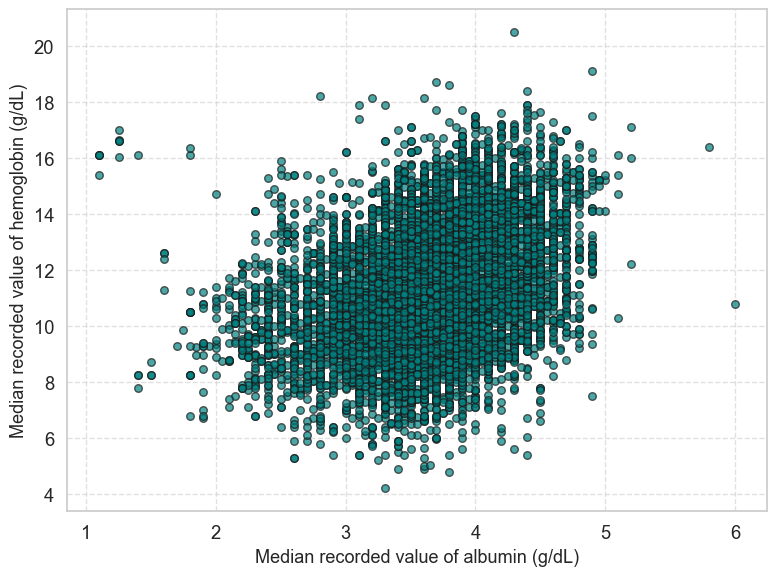

In [ ]:
# Set a modern style
sns.set(style="whitegrid", context="notebook", font_scale=1.2)

plt.figure(figsize=(8, 6))
plt.scatter(
    ckd_filtered['albumin_median'],
    ckd_filtered['hemoglobin_median'],
    c='teal',           # Custom color
    edgecolor='k',      # Black edge for points
    alpha=0.7,          # Slight transparency
    s=30                # Small point size
)

plt.xlabel('Median recorded value of albumin (g/dL)', fontsize=13)
plt.ylabel('Median recorded value of hemoglobin (g/dL)', fontsize=13)
# plt.title('Scatterplot of Albumin vs. Hemoglobin', fontsize=15, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('alb_hemp.pdf',  format='pdf')
plt.show()


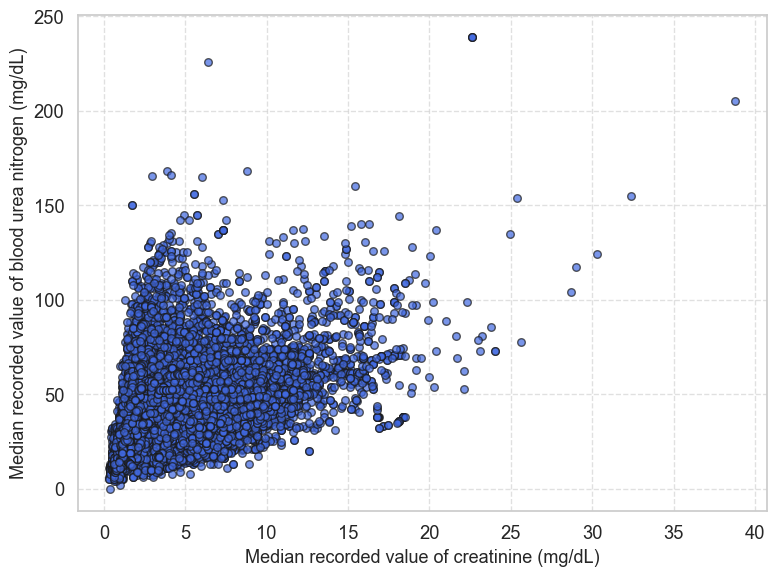

In [ ]:
sns.set(style="whitegrid", context="notebook", font_scale=1.2)

plt.figure(figsize=(8, 6))
plt.scatter(
    ckd_filtered['creatinine_median'],
    ckd_filtered['bun_median'],
    c='royalblue',      # Attractive color for points
    edgecolor='k',      # Black border for points
    alpha=0.7,          # Transparency
    s=30                # Small Size of points
)

plt.xlabel('Median recorded value of creatinine (mg/dL)', fontsize=13)
plt.ylabel('Median recorded value of blood urea nitrogen (mg/dL)', fontsize=13)
# plt.title('Scatterplot of Creatinine vs. Blood Urea Nitrogen', fontsize=15, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('cr_bun.pdf', format='pdf')
plt.show()